<a href="https://colab.research.google.com/github/Riverag0011/ADS509-Text-Mining/blob/main/Assignment_2_Lyrics_and_Description_EDA_GR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 2: Lyrics and Description EDA

Name: Gabi Rivera \
Course: ADS409-01 \
Date: 15Sep2024

# ADS 509 Assignment 2.1: Tokenization, Normalization, Descriptive Statistics

This notebook holds Assignment 2.1 for Module 2 in ADS 509, Applied Text Mining. Work through this notebook, writing code and answering questions where required.

In the previous assignment you put together Twitter data and lyrics data on two artists. In this assignment we explore some of the textual features of those data sets. If, for some reason, you did not complete that previous assignment, data to use for this assignment can be found in the assignment materials section of Blackboard.

This assignment asks you to write a short function to calculate some descriptive statistics on a piece of text. Then you are asked to find some interesting and unique statistics on your corpora.


## General Assignment Instructions

These instructions are included in every assignment, to remind you of the coding standards for the class. Feel free to delete this cell after reading it.

One sign of mature code is conforming to a style guide. We recommend the [Google Python Style Guide](https://google.github.io/styleguide/pyguide.html). If you use a different style guide, please include a cell with a link.

Your code should be relatively easy-to-read, sensibly commented, and clean. Writing code is a messy process, so please be sure to edit your final submission. Remove any cells that are not needed or parts of cells that contain unnecessary code. Remove inessential `import` statements and make sure that all such statements are moved into the designated cell.

Make use of non-code cells for written commentary. These cells should be grammatical and clearly written. In some of these cells you will have questions to answer. The questions will be marked by a "Q:" and will have a corresponding "A:" spot for you. *Make sure to answer every question marked with a `Q:` for full credit.*


In [ ]:
# Add any additional import statements you need here
#!pip install nltk
#!pip install emoji
#!pip install pandas
#!pip install matplotlib
import nltk
nltk.download('stopwords')
from collections import defaultdict
import string
import csv
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to /Users/gabi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
import os
import re
import emoji
import pandas as pd
import numpy as np

from collections import Counter, defaultdict
from nltk.corpus import stopwords
from string import punctuation

In [ ]:
# change `data_location` to the location of the folder on your machine.
#data_location = "/content/M1 Results"
data_location = "/Users/gabi/Desktop/MSADS/MSADS6/ADS-509-01 Applied Text Mining/Module2 Preparing Data for Analysis and Descriptive Statistics/Assignment"

# These subfolders should still work if you correctly stored the
# data from the Module 1 assignment
twitter_folder = os.path.join(data_location, "twitter")
lyrics_folder = os.path.join(data_location, "lyrics")

In [ ]:
from collections import Counter

def descriptive_stats(tokens, num_tokens=5, verbose=True):
    """
    Given a list of tokens, print number of tokens, number of unique tokens,
    number of characters, lexical diversity, and num_tokens most common tokens.
    Return a list with the number of tokens, number of unique tokens,
    lexical diversity, and number of characters.
    """
    # Calculate the number of tokens
    num_tokens = len(tokens)

    # Calculate the number of unique tokens
    unique_tokens = set(tokens)
    num_unique_tokens = len(unique_tokens)

    # Calculate the number of characters
    num_characters = sum(len(token) for token in tokens)

    # Calculate lexical diversity
    lexical_diversity = num_unique_tokens / num_tokens if num_tokens > 0 else 0

    # Calculate the frequency of each token
    token_frequencies = Counter(tokens)

    # Get the most common tokens
    most_common_tokens = token_frequencies.most_common(num_tokens)

    # Print statistics if verbose
    if verbose:
        print(f"There are {num_tokens} tokens in the data.")
        print(f"There are {num_unique_tokens} unique tokens in the data.")
        print(f"There are {num_characters} characters in the data.")
        print(f"The lexical diversity is {lexical_diversity:.3f} in the data.")

        # Print the most common tokens
        print(f"The {num_tokens} most common tokens are:")
        for token, count in most_common_tokens:
            print(f"{token}: {count}")

    return [num_tokens, num_unique_tokens, lexical_diversity, num_characters]

In [ ]:
text = """here is some example text with other example text here in this text""".split()
assert(descriptive_stats(text, verbose=True)[0] == 13)
assert(descriptive_stats(text, verbose=False)[1] == 9)
assert(abs(descriptive_stats(text, verbose=False)[2] - 0.69) < 0.02)
assert(descriptive_stats(text, verbose=False)[3] == 55)

There are 13 tokens in the data.
There are 9 unique tokens in the data.
There are 55 characters in the data.
The lexical diversity is 0.692 in the data.
The 13 most common tokens are:
text: 3
here: 2
example: 2
is: 1
some: 1
with: 1
other: 1
in: 1
this: 1


Q: Why is it beneficial to use assertion statements in your code?

A: Assertion statemetns allows us to double check that the code is working. It's a way to verify that working under the assumptions that we have of the code.

## Data Input

Now read in each of the corpora. For the lyrics data, it may be convenient to store the entire contents of the file to make it easier to inspect the titles individually, as you'll do in the last part of the assignment. In the solution, I stored the lyrics data in a dictionary with two dimensions of keys: artist and song. The value was the file contents. A data frame would work equally well.

For the Twitter data, we only need the description field for this assignment. Feel free all the descriptions read it into a data structure. In the solution, I stored the descriptions as a dictionary of lists, with the key being the artist.




In [ ]:
# Read in the lyrics data

# Define the folder containing lyrics
#lyrics_folder = "/content/M1 Results/lyrics"
lyrics_folder = "/Users/gabi/Desktop/MSADS/MSADS6/ADS-509-01 Applied Text Mining/Module2 Preparing Data for Analysis and Descriptive Statistics/Assignment/M1 Results/lyrics"

# Initialize a dictionary to store lyrics by artist and song
lyrics_data = defaultdict(lambda: defaultdict(str))

# Function to read lyrics from text files
def read_lyrics_from_text(file_path):
    try:
        with open(file_path, 'r', encoding='utf-8') as file:
            content = file.read()
            return content
    except Exception as e:
        print(f"Error reading file {file_path}: {e}")
        return ""

# Read lyrics data
for artist in os.listdir(lyrics_folder):
    artist_path = os.path.join(lyrics_folder, artist)
    if os.path.isdir(artist_path) and artist != '.ipynb_checkpoints':
        for song_file in os.listdir(artist_path):
            song_path = os.path.join(artist_path, song_file)
            if os.path.isfile(song_path):
                lyrics = read_lyrics_from_text(song_path)
                song_title = os.path.splitext(song_file)[0]
                lyrics_data[artist][song_title] = lyrics

# Convert dictionary to a DataFrame
data = {
    'artist': [],
    'song': [],
    'lyrics': []
}
for artist, songs in lyrics_data.items():
    for song, lyrics in songs.items():
        data['artist'].append(artist)
        data['song'].append(song)
        data['lyrics'].append(lyrics)

lyrics_df = pd.DataFrame(data)

# Limit to 5 songs for display
limited_df = lyrics_df.head(5)

# Display the dictionary and DataFrame to verify
print("Lyrics Data Dictionary (limited to 5 songs):")
for i, (artist, songs) in enumerate(lyrics_data.items()):
    if i >= 5:
        break
    for j, (song, lyrics) in enumerate(songs.items()):
        if j >= 5:
            break
        print(f"Artist: {artist}")
        print(f"  Song: {song}")
        print(f"    Lyrics (first 50 characters): {lyrics[:50]}...")

print("\nLyrics DataFrame (limited to 5 songs):")
print(limited_df.head(5))


Lyrics Data Dictionary (limited to 5 songs):
Artist: robyn
  Song: robyn_includemeout
    Lyrics (first 50 characters): "Include Me Out"



It is really very simple
Just ...
Artist: robyn
  Song: robyn_electric
    Lyrics (first 50 characters): "Electric"



Electric...

It's electric
It's a na...
Artist: robyn
  Song: robyn_beach2k20
    Lyrics (first 50 characters): "Beach 2K20"



(So you wanna go out?
How you gonn...
Artist: robyn
  Song: robyn_lovekills
    Lyrics (first 50 characters): "Love Kills"



If you're looking for love
Get a h...
Artist: robyn
  Song: robyn_timemachine
    Lyrics (first 50 characters): "Time Machine"



Hey, what did I do?
Can't believ...
Artist: cher
  Song: cher_comeandstaywithme
    Lyrics (first 50 characters): "Come And Stay With Me"



I'll send away all my f...
Artist: cher
  Song: cher_pirate
    Lyrics (first 50 characters): "Pirate"



He'll sail on with the summer wind
Tha...
Artist: cher
  Song: cher_stars
    Lyrics (first 50 characters): "S

In [ ]:
# Read in the twitter data

# Define the folder containing twitter
twitter_folder = "/Users/gabi/Desktop/MSADS/MSADS6/ADS-509-01 Applied Text Mining/Module2 Preparing Data for Analysis and Descriptive Statistics/Assignment/M1 Results/twitter"

# Initialize a dictionary to store descriptions by artist
twitter_descriptions = defaultdict(list)

# Function to clean and decode the file, handling null bytes and large fields
def clean_and_decode_file(file_path):
    try:
        # Read the file in binary mode and remove null bytes
        with open(file_path, 'rb') as file:
            content = file.read().replace(b'\x00', b'')
        return content.decode('utf-8')  # Decode to string
    except Exception as e:
        print(f"Error reading file {file_path}: {e}")
        return ""

# Function to extract descriptions from text files
def extract_description_from_text(file_path):
    try:
        content = clean_and_decode_file(file_path)
        descriptions = []
        # Use StringIO to simulate a file object
        from io import StringIO
        # Use csv.reader to handle tab-separated values
        reader = csv.reader(StringIO(content), delimiter='\t')
        header = next(reader, None)
        if header is None:
            print(f"Warning: No header found in file {file_path}.")
            return descriptions
        if 'description' not in header:
            print(f"Warning: 'description' column not found in file {file_path}.")
            return descriptions
        description_idx = header.index('description')
        for row in reader:
            if len(row) > description_idx:
                descriptions.append(row[description_idx])
        return descriptions
    except Exception as e:
        print(f"Error processing file {file_path}: {e}")
        return []

# Increase field size limit for csv.reader
csv.field_size_limit(10 * 1024 * 1024)

# Read Twitter data
for tweet_file in os.listdir(twitter_folder):
    tweet_path = os.path.join(twitter_folder, tweet_file)
    if os.path.isfile(tweet_path) and tweet_file.endswith('_data.txt'):
        descriptions = extract_description_from_text(tweet_path)
        if descriptions:
            artist = os.path.splitext(tweet_file)[0]
            twitter_descriptions[artist].extend(descriptions)

# Convert dictionary to a DataFrame for easier manipulation
twitter_descriptions_df = pd.DataFrame([
    {'artist': artist, 'description': desc}
    for artist, descriptions in twitter_descriptions.items()
    for desc in descriptions
])

# Display the dictionary and DataFrame to verify
print("Twitter Descriptions Dictionary (sample):")
for artist, descriptions in list(twitter_descriptions.items())[:2]:
    print(f"Artist: {artist}")
    print(f"  Descriptions: {descriptions[:5]}...")

print("\nTwitter Descriptions DataFrame (sample):")
print(twitter_descriptions_df.head(10))

Twitter Descriptions Dictionary (sample):
Artist: cher_followers_data
  Descriptions: ['', '𝙿𝚛𝚘𝚞𝚍 𝚜𝚞𝚙𝚙𝚘𝚛𝚝𝚎𝚛 𝚘𝚏 𝚖𝚎𝚜𝚜𝚢 𝚋𝚞𝚗𝚜 & 𝚕𝚎𝚐𝚐𝚒𝚗𝚐𝚜', '163㎝／愛かっぷ💜26歳🍒 工〇好きな女の子💓 フォローしてくれたらDMします🧡', 'csu', 'Writer @Washinformer @SpelmanCollege alumna #DCnative Award-winning journalist & PR pro @IABC Fellow & Past Chair IG: bcscomm Email: wibsiler@gmail.com']...
Artist: robynkonichiwa_followers_data
  Descriptions: ['I love chill •Facebook / Instagram / SoundCloud: AngelxoArts• https://t.co/447okKLKzA…', "books, movies, music, nature & TV shows. OG Sweetee since '12 thanks to YouTube recommending 'This Feeling' on my homepage ♥️", '(Am)auteur en herbe 🌱 - juriste en paille 🤡 - Ami des fleurs 🌸🌈 (sans la main verte) - music & books - #morecomingsoon... (si on en voit le bout)', 'This Twitter profile is full of sarcasm and rants with the occasional moan, dont like me dont follow me! KLF Stan Account Aspiring Youth Council rep', 'Flora Youssef - Blogger & Founder Posting review articles about the latest musi

## Data Cleaning

Now clean and tokenize your data. Remove punctuation chacters (available in the `punctuation` object in the `string` library), split on whitespace, fold to lowercase, and remove stopwords. Store your cleaned data, which must be accessible as an interable for `descriptive_stats`, in new objects or in new columns in your data frame.



In [ ]:
# Initialize stopwords and punctuation
sw = set(stopwords.words("english"))
punctuation = set(string.punctuation)

In [ ]:
# create your clean twitter data here



# Initialize a dictionary to store descriptions by artist
twitter_descriptions = defaultdict(list)

# Function to read descriptions from text files with error handling
def read_description_from_text(file_path):
    try:
        # Try reading the file as a CSV with automatic delimiter detection
        df = pd.read_csv(file_path, sep=None, engine='python', on_bad_lines='skip')
        if 'description' in df.columns:
            # Return a list of descriptions, dropping NaN values
            return df['description'].dropna().tolist()
        else:
            print(f"'description' column not found in file {file_path}")
            return []
    except Exception as e:
        print(f"Error reading file {file_path}: {e}")
        return []

# Function to clean and tokenize text
def clean_and_tokenize(text):
    # Remove punctuation
    text = ''.join(ch for ch in text if ch not in punctuation)
    # Convert to lowercase
    text = text.lower()
    # Split on whitespace
    tokens = text.split()
    # Remove stopwords and tokens that are not purely alphabetic or are too short
    tokens = [word for word in tokens if word not in sw and word.isalpha() and len(word) > 2]
    return tokens

# Read Twitter data
for tweet_file in os.listdir(twitter_folder):
    tweet_path = os.path.join(twitter_folder, tweet_file)
    if os.path.isfile(tweet_path):
        # Process only files that contain comments (with 'data' in the filename)
        if 'data' in tweet_file:
            descriptions = read_description_from_text(tweet_path)
            artist = os.path.splitext(tweet_file)[0]
            for description in descriptions:
                cleaned_tokens = clean_and_tokenize(description)
                twitter_descriptions[artist].extend(cleaned_tokens)

# Convert dictionary to a DataFrame
twitter_data = {
    'artist': [],
    'description_tokens': []
}
for artist, tokens in twitter_descriptions.items():
    twitter_data['artist'].append(artist)
    twitter_data['description_tokens'].append(tokens)

twitter_df = pd.DataFrame(twitter_data)

# Display the DataFrame to verify
print("Twitter DataFrame with Cleaned Tokens:")
print(twitter_df.head())

# For verification, check the first few entries in the dictionary
print("\nTwitter Descriptions Dictionary (sample):")
for artist in list(twitter_descriptions.keys())[:2]:
    print(f"Artist: {artist}")
    print(f"  Tokens: {twitter_descriptions[artist][:10]}...")


Twitter DataFrame with Cleaned Tokens:
                          artist  \
0            cher_followers_data   
1  robynkonichiwa_followers_data   

                                  description_tokens  
0  [𝙿𝚛𝚘𝚞𝚍, 𝚜𝚞𝚙𝚙𝚘𝚛𝚝𝚎𝚛, 𝚖𝚎𝚜𝚜𝚢, 𝚋𝚞𝚗𝚜, 𝚕𝚎𝚐𝚐𝚒𝚗𝚐𝚜, csu,...  
1  [books, movies, music, nature, shows, sweetee,...  

Twitter Descriptions Dictionary (sample):
Artist: cher_followers_data
  Tokens: ['𝙿𝚛𝚘𝚞𝚍', '𝚜𝚞𝚙𝚙𝚘𝚛𝚝𝚎𝚛', '𝚖𝚎𝚜𝚜𝚢', '𝚋𝚞𝚗𝚜', '𝚕𝚎𝚐𝚐𝚒𝚗𝚐𝚜', 'csu', 'writer', 'washinformer', 'spelmancollege', 'alumna']...
Artist: robynkonichiwa_followers_data
  Tokens: ['books', 'movies', 'music', 'nature', 'shows', 'sweetee', 'since', 'thanks', 'youtube', 'recommending']...


In [ ]:
# create your clean lyrics data here



# Initialize a dictionary to store lyrics by artist and song
lyrics_data = defaultdict(lambda: defaultdict(str))

# Function to clean and tokenize text
def clean_and_tokenize(text):
    # Remove punctuation
    text = ''.join(ch for ch in text if ch not in punctuation)
    # Convert to lowercase
    text = text.lower()
    # Split on whitespace
    tokens = text.split()
    # Remove stopwords and tokens that are not purely alphabetic or are too short
    tokens = [word for word in tokens if word not in sw and word.isalpha() and len(word) > 2]
    return tokens

# Traverse the directory structure to process lyrics files
for artist_folder in os.listdir(lyrics_folder):
    artist_folder_path = os.path.join(lyrics_folder, artist_folder)
    if os.path.isdir(artist_folder_path):
        for file_name in os.listdir(artist_folder_path):
            file_path = os.path.join(artist_folder_path, file_name)
            if os.path.isfile(file_path) and file_name.endswith('.txt'):
                try:
                    with open(file_path, 'r', encoding='utf-8') as file:
                        # Read the file
                        content = file.read()
                        # Extract the title and lyrics
                        parts = content.split('\n', 1)
                        if len(parts) == 2:
                            title, lyrics = parts
                            # Clean and tokenize the lyrics
                            cleaned_tokens = clean_and_tokenize(lyrics)
                            # Store the cleaned lyrics
                            lyrics_data[artist_folder][title] = cleaned_tokens
                except Exception as e:
                    print(f"Error reading file {file_path}: {e}")

# Convert the dictionary to a DataFrame for easier inspection
lyrics_list = []
for artist, songs in lyrics_data.items():
    for song, tokens in songs.items():
        lyrics_list.append({
            'artist': artist,
            'song': song,
            'lyrics_tokens': tokens
        })

lyrics_df = pd.DataFrame(lyrics_list)

# Display the DataFrame to verify
print("Lyrics DataFrame with Cleaned Tokens:")
print(lyrics_df.head(10))

# For verification, check the first few entries in the dictionary
print("\nSample Lyrics Dictionary:")
for artist in list(lyrics_data.keys())[:2]:
    print(f"Artist: {artist}")
    for song in list(lyrics_data[artist].keys())[:2]:
        print(f"  Song: {song}")
        print(f"    Tokens: {lyrics_data[artist][song][:10]}...")


Lyrics DataFrame with Cleaned Tokens:
  artist                 song  \
0  robyn     "Include Me Out"   
1  robyn           "Electric"   
2  robyn         "Beach 2K20"   
3  robyn         "Love Kills"   
4  robyn       "Time Machine"   
5  robyn    "Giving You Back"   
6  robyn        "None Of Dem"   
7  robyn           "Be Mine!"   
8  robyn             "Fembot"   
9  robyn  "Should Have Known"   

                                       lyrics_tokens  
0  [really, simple, single, pulse, repeated, regu...  
1  [electric, electric, natural, high, electric, ...  
2  [wanna, gonna, get, call, someone, alright, ca...  
3  [youre, looking, love, get, heart, made, steel...  
4  [hey, cant, believe, fit, threw, stupid, wante...  
5  [another, time, another, life, another, situat...  
6  [none, boys, dance, single, one, stand, chance...  
7  [good, thing, tears, never, show, pouring, rai...  
8  [ive, got, news, fembots, feelings, split, hea...  
9  [seen, coming, fucking, known, could, let, pl

## Basic Descriptive Statistics

Call your `descriptive_stats` function on both your lyrics data and your twitter data and for both artists (four total calls).

In [ ]:
lyrics_df.head()

,artist,song,lyrics_tokens
0,robyn,"""Include Me Out""","[really, simple, single, pulse, repeated, regu..."
1,robyn,"""Electric""","[electric, electric, natural, high, electric, ..."
2,robyn,"""Beach 2K20""","[wanna, gonna, get, call, someone, alright, ca..."
3,robyn,"""Love Kills""","[youre, looking, love, get, heart, made, steel..."
4,robyn,"""Time Machine""","[hey, cant, believe, fit, threw, stupid, wante..."


In [ ]:
twitter_df.head()

,artist,description_tokens
0,cher_followers_data,"[𝙿𝚛𝚘𝚞𝚍, 𝚜𝚞𝚙𝚙𝚘𝚛𝚝𝚎𝚛, 𝚖𝚎𝚜𝚜𝚢, 𝚋𝚞𝚗𝚜, 𝚕𝚎𝚐𝚐𝚒𝚗𝚐𝚜, csu,..."
1,robynkonichiwa_followers_data,"[books, movies, music, nature, shows, sweetee,..."


In [ ]:
# Define the descriptive_stats function
from collections import Counter

def descriptive_stats(tokens, num_tokens=5, verbose=True):
    """
    Given a list of tokens, print number of tokens, number of unique tokens,
    number of characters, lexical diversity, and num_tokens most common tokens.
    Return a list with the number of tokens, number of unique tokens,
    lexical diversity, and number of characters.
    """
    num_tokens = len(tokens)
    num_unique_tokens = len(set(tokens))
    lexical_diversity = num_unique_tokens / num_tokens if num_tokens > 0 else 0
    num_characters = sum(len(token) for token in tokens)
    most_common_tokens = Counter(tokens).most_common(num_tokens)

    if verbose:
        print(f"There are {num_tokens} tokens in the data.")
        print(f"There are {num_unique_tokens} unique tokens in the data.")
        print(f"There are {num_characters} characters in the data.")
        print(f"The lexical diversity is {lexical_diversity:.3f} in the data.")
        #print(f"Most common tokens: {most_common_tokens}")

    return [num_tokens, num_unique_tokens, lexical_diversity, num_characters]


In [ ]:
# Apply descriptive_stats to each artist in lyrics data
for artist in lyrics_df['artist'].unique():
    artist_lyrics_tokens = lyrics_df[lyrics_df['artist'] == artist]['lyrics_tokens'].explode().tolist()
    print(f"\nDescriptive statistics for artist: {artist}")
    descriptive_stats(artist_lyrics_tokens)


Descriptive statistics for artist: robyn
There are 12312 tokens in the data.
There are 2046 unique tokens in the data.
There are 60901 characters in the data.
The lexical diversity is 0.166 in the data.

Descriptive statistics for artist: cher
There are 33501 tokens in the data.
There are 3615 unique tokens in the data.
There are 164718 characters in the data.
The lexical diversity is 0.108 in the data.


In [ ]:
# Apply descriptive_stats to each artist in twitter data
for artist in twitter_df['artist'].unique():
    artist_twitter_tokens = twitter_df[twitter_df['artist'] == artist]['description_tokens'].explode().tolist()
    print(f"\nDescriptive statistics for artist: {artist}")
    descriptive_stats(artist_twitter_tokens)


Descriptive statistics for artist: cher_followers_data
There are 13068384 tokens in the data.
There are 959722 unique tokens in the data.
There are 81748253 characters in the data.
The lexical diversity is 0.073 in the data.

Descriptive statistics for artist: robynkonichiwa_followers_data
There are 1262649 tokens in the data.
There are 195628 unique tokens in the data.
There are 8135552 characters in the data.
The lexical diversity is 0.155 in the data.


Q: How do you think the "top 5 words" would be different if we left stopwords in the data?

A: If we don't remove the stopwords which are the most common words like "is" and "the", then I would expect that majority of the top 5 words would include stopwords.

---

Q: What were your prior beliefs about the lexical diversity between the artists? Does the difference (or lack thereof) in lexical diversity between the artists conform to your prior beliefs?

A: I don't personally know much about both artist but I know that they are both pop singers. Robyn might be more niche and she is more involved in writting her own songs. So I would assume that Robyn might have slightly higher lexical diversity but not significantly different with her lyrics. We can see that this is the case if we compare the lexical diverity lyrics scores between the two artists. Robyn's twetter lexical diversity is significantly higher than cher. This might be connected to increased engagement with having varied of vocabulary and topics.  



## Specialty Statistics

The descriptive statistics we have calculated are quite generic. You will now calculate a handful of statistics tailored to these data.

1. Ten most common emojis by artist in the twitter descriptions.
1. Ten most common hashtags by artist in the twitter descriptions.
1. Five most common words in song titles by artist.
1. For each artist, a histogram of song lengths (in terms of number of tokens)

We can use the `emoji` library to help us identify emojis and you have been given a function to help you.


In [ ]:
assert(emoji.is_emoji("❤️"))
assert(not emoji.is_emoji(":-)"))

### Emojis 😁

What are the ten most common emojis by artist in the twitter descriptions?


In [ ]:
twitter_descriptions_df.head()

,artist,description
0,cher_followers_data,
1,cher_followers_data,𝙿𝚛𝚘𝚞𝚍 𝚜𝚞𝚙𝚙𝚘𝚛𝚝𝚎𝚛 𝚘𝚏 𝚖𝚎𝚜𝚜𝚢 𝚋𝚞𝚗𝚜 & 𝚕𝚎𝚐𝚐𝚒𝚗𝚐𝚜
2,cher_followers_data,163㎝／愛かっぷ💜26歳🍒 工〇好きな女の子💓 フォローしてくれたらDMします🧡
3,cher_followers_data,csu
4,cher_followers_data,Writer @Washinformer @SpelmanCollege alumna #D...


In [ ]:
# Extract and Count top 10 Emojis for each artist
def extract_emojis(text):
    """
    Extract emojis from a given text.
    """
    return [char for char in text if emoji.is_emoji(char)]

def top_emojis_by_artist(twitter_descriptions_df):
    """
    For each artist in the DataFrame, print the ten most common emojis.
    """
    # Initialize a dictionary to store emoji counts by artist
    artist_emoji_counts = {}

    # Iterate through each artist in the DataFrame
    for artist in twitter_df['artist'].unique():
        # Filter the DataFrame for the current artist
        artist_data = twitter_descriptions_df[twitter_descriptions_df['artist'] == artist]

        # Combine all description texts for the artist into a single string
        all_description_texts = ' '.join(artist_data['description'].astype(str).tolist())

        # Extract emojis from the combined description texts
        emojis = extract_emojis(all_description_texts)

        # Count the frequency of each emoji
        emoji_counts = Counter(emojis)

        # Store the counts in the dictionary
        artist_emoji_counts[artist] = emoji_counts

        # Print the ten most common emojis for the artist
        print(f"\nTop 10 emojis for artist: {artist}")
        for emoji_char, count in emoji_counts.most_common(10):
            print(f"Emoji: {emoji_char} | Count: {count}")

    return artist_emoji_counts

# Call the function with your Twitter DataFrame
artist_emoji_counts = top_emojis_by_artist(twitter_descriptions_df)



Top 10 emojis for artist: cher_followers_data
Emoji: ❤ | Count: 79482
Emoji: 🌈 | Count: 47853
Emoji: ♥ | Count: 34304
Emoji: 🏳 | Count: 33640
Emoji: ✨ | Count: 29776
Emoji: 💙 | Count: 21529
Emoji: 🏻 | Count: 20993
Emoji: 🌊 | Count: 20350
Emoji: ✌ | Count: 16887
Emoji: 💜 | Count: 16624

Top 10 emojis for artist: robynkonichiwa_followers_data
Emoji: ❤ | Count: 4808
Emoji: 🌈 | Count: 4702
Emoji: 🏳 | Count: 3539
Emoji: ♥ | Count: 3117
Emoji: ✨ | Count: 2240
Emoji: 🏻 | Count: 1498
Emoji: ✌ | Count: 1194
Emoji: 🏼 | Count: 1145
Emoji: ♀ | Count: 848
Emoji: 💙 | Count: 818


### Hashtags

What are the ten most common hashtags by artist in the twitter descriptions?


In [ ]:
# Extract and Count top 10 Emojis for each artist
def extract_hashtags(text):
    """
    Extract hashtags from a given text.
    """
    return re.findall(r'#\w+', text)

def top_hashtags_by_artist(twitter_descriptions_df):
    """
    For each artist in the DataFrame, print the ten most common hashtags.
    """
    # Initialize a dictionary to store hashtag counts by artist
    artist_hashtag_counts = {}

    # Iterate through each artist in the DataFrame
    for artist in twitter_descriptions_df['artist'].unique():
        # Filter the DataFrame for the current artist
        artist_data = twitter_descriptions_df[twitter_descriptions_df['artist'] == artist]

        # Combine all description texts for the artist into a single string
        all_description_texts = ' '.join(artist_data['description'].astype(str).tolist())

        # Extract hashtags from the combined description texts
        hashtags = extract_hashtags(all_description_texts)

        # Count the frequency of each hashtag
        hashtag_counts = Counter(hashtags)

        # Store the counts in the dictionary
        artist_hashtag_counts[artist] = hashtag_counts

        # Print the ten most common hashtags for the artist
        print(f"\nTop 10 hashtags for artist: {artist}")
        for hashtag, count in hashtag_counts.most_common(10):
            print(f"Hashtag: {hashtag} | Count: {count}")

    return artist_hashtag_counts

# Call the function with your Twitter DataFrame
artist_hashtag_counts = top_hashtags_by_artist(twitter_descriptions_df)


Top 10 hashtags for artist: cher_followers_data
Hashtag: #BLM | Count: 9541
Hashtag: #Resist | Count: 6035
Hashtag: #BlackLivesMatter | Count: 4683
Hashtag: #resist | Count: 3797
Hashtag: #FBR | Count: 3240
Hashtag: #TheResistance | Count: 2995
Hashtag: #blacklivesmatter | Count: 2645
Hashtag: #1 | Count: 2637
Hashtag: #Resistance | Count: 1917
Hashtag: #RESIST | Count: 1824

Top 10 hashtags for artist: robynkonichiwa_followers_data
Hashtag: #BlackLivesMatter | Count: 337
Hashtag: #BLM | Count: 307
Hashtag: #blacklivesmatter | Count: 208
Hashtag: #1 | Count: 199
Hashtag: #music | Count: 174
Hashtag: #Music | Count: 113
Hashtag: #EDM | Count: 86
Hashtag: #LGBTQ | Count: 75
Hashtag: #TeamFollowBack | Count: 59
Hashtag: #blm | Count: 56


### Song Titles

What are the five most common words in song titles by artist? The song titles should be on the first line of the lyrics pages, so if you have kept the raw file contents around, you will not need to re-read the data.


In [ ]:
# Function to tokenize text
def tokenize(text):
    # Remove punctuation and split text into words
    text = text.translate(str.maketrans('', '', string.punctuation))
    words = text.lower().split()
    return words

def top_words_in_song_titles(lyrics_df, num_common_words=5):
    """
    Find the top most common words in song titles by artist.
    """
    # Initialize a dictionary to store word counts by artist
    artist_word_counts = {}

    # Iterate through each artist
    for artist in lyrics_df['artist'].unique():
        # Filter DataFrame for the current artist
        artist_data = lyrics_df[lyrics_df['artist'] == artist]

        # Get song titles
        titles = artist_data['song']
        all_words = []

        # Tokenize each title and aggregate words
        for title in titles:
            words = tokenize(title)
            all_words.extend(words)

        # Count the frequency of each word
        word_counts = Counter(all_words)

        # Store the counts in the dictionary
        artist_word_counts[artist] = word_counts

        # Print the five most common words for the artist
        print(f"\nTop {num_common_words} words in song titles for artist: {artist}")
        for word, count in word_counts.most_common(num_common_words):
            print(f"Word: {word} | Count: {count}")

    return artist_word_counts

# Call the function with your DataFrame
artist_word_counts = top_words_in_song_titles(lyrics_df)


Top 5 words in song titles for artist: robyn
Word: me | Count: 9
Word: you | Count: 8
Word: the | Count: 7
Word: my | Count: 6
Word: love | Count: 5

Top 5 words in song titles for artist: cher
Word: the | Count: 54
Word: you | Count: 41
Word: love | Count: 36
Word: i | Count: 32
Word: to | Count: 28


### Song Lengths

For each artist, a histogram of song lengths (in terms of number of tokens). If you put the song lengths in a data frame with an artist column, matplotlib will make the plotting quite easy. An example is given to help you out.


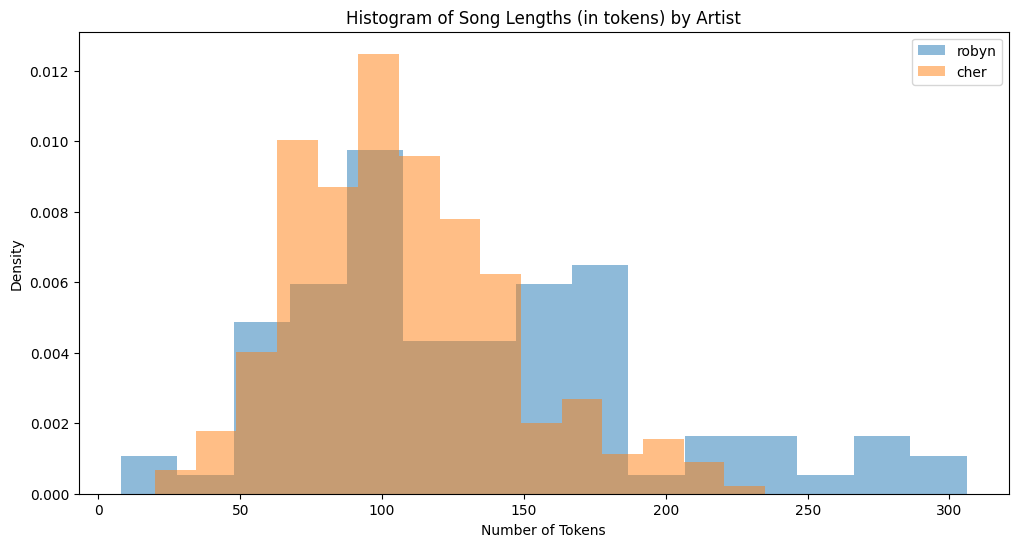

In [ ]:
# Calculate song lengths (number of tokens)
lyrics_df['length'] = lyrics_df['lyrics_tokens'].apply(len)

# Prepare DataFrame for plotting
plot_df = pd.DataFrame({
    'artist': lyrics_df['artist'],
    'length': lyrics_df['length']
})

# Plot histograms
plt.figure(figsize=(12, 6))

for artist in plot_df['artist'].unique():
    subset = plot_df[plot_df['artist'] == artist]
    plt.hist(subset['length'], bins=15, alpha=0.5, label=artist, density=True)

plt.xlabel('Number of Tokens')
plt.ylabel('Density')
plt.title('Histogram of Song Lengths (in tokens) by Artist')
plt.legend()
plt.show()

Since the lyrics may be stored with carriage returns or tabs, it may be useful to have a function that can collapse whitespace, using regular expressions, and be used for splitting.

Q: What does the regular expression `'\s+'` match on?

A: '\s+' matches one or more consecutive whitespace characters.


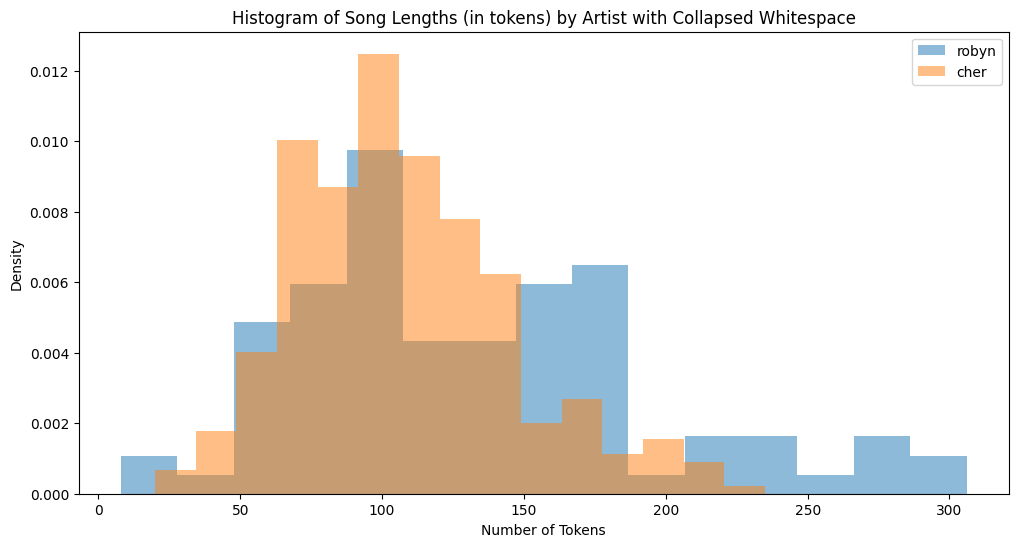

In [ ]:
# Define the collapse_whitespace and tokenize_lyrics functions
collapse_whitespace = re.compile(r'\s+')

def tokenize_lyrics(lyric):
    """Strip and split on whitespace"""
    return [item.lower() for item in collapse_whitespace.split(lyric) if item]

# Tokenize the lyrics using the updated function
lyrics_df['lyrics_tokens'] = lyrics_df['lyrics_tokens'].apply(lambda x: tokenize_lyrics(' '.join(x)))

# Calculate length of each song (number of tokens)
lyrics_df['length'] = lyrics_df['lyrics_tokens'].apply(len)

# Prepare DataFrame for plotting
plt.figure(figsize=(12, 6))

for artist in lyrics_df['artist'].unique():
    subset = lyrics_df[lyrics_df['artist'] == artist]
    plt.hist(subset['length'], bins=15, alpha=0.5, label=artist, density=True)

plt.xlabel('Number of Tokens')
plt.ylabel('Density')
plt.title('Histogram of Song Lengths (in tokens) by Artist with Collapsed Whitespace')
plt.legend()
plt.show()